# Liczba hospitalizacji podzielona przez liczbę zakażeń dla różnych krajów

In [1]:
"""
Set PYTHONPATH for modules in parallel directory

https://stackoverflow.com/questions/3108285/in-python-script-how-do-i-set-pythonpath/3108301

"""

import sys

try:
    sys.path.index('..') # Or os.getcwd() for this directory
except ValueError:
    sys.path.append('..') # Or os.getcwd() for this directory

#--------------------------------------------------------------
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
from share.helper_functions import set_legend_right


In [2]:
url_cases = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/jhu/new_cases.csv"
url_hosp = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/hospitalizations/covid-hospitalizations.csv"

In [3]:
df_cases=pd.read_csv(url_cases)
df_hosp=pd.read_csv(url_hosp)

In [50]:
countries = [
    'Poland',
    'Denmark',
    'United Kingdom',
    'United States'
    ]


In [51]:
dfc = {}
indicator = 'Cases'
for country in countries:
    dfc[country] = pd.DataFrame

    dfc[country] = df_cases[['date', country]].copy(deep=True)
    dfc[country]['date'] = pd.to_datetime(dfc[country]['date'], format = "%Y-%m-%d")

    dfc[country].index = dfc[country]['date']
    dfc[country].index.name = 'Date'
    dfc[country].drop('date', axis = 1 , inplace=True)
    dfc[country].rename({country:indicator}, axis=1, inplace=True)
    dfc[country]= dfc[country].apply(pd.to_numeric)

    # display(country, dfc[country])

In [52]:
dfh = {}
indicator = 'Daily hospital occupancy'

for country in countries:
    dfh[country] = pd.DataFrame
    dfh0 = df_hosp[(df_hosp['entity'] == country) & (df_hosp['indicator'] == indicator)]

    dfh[country] = dfh0[['date', 'value']].copy(deep=True)
    dfh[country]['date'] = pd.to_datetime(dfh[country]['date'], format = "%Y-%m-%d")
    dfh[country].index = dfh[country]['date']
    dfh[country].index.name = 'Date'
    dfh[country].drop('date', axis=1, inplace=True)
    dfh[country].rename(columns={'value': indicator}, inplace=True)
    dfh[country]= dfh[country].apply(pd.to_numeric)
    # display(country, dfh[country])

In [53]:
df = {}
for country in countries:
    df[country] = pd.DataFrame
    df[country] = pd.concat([dfc[country], dfh[country]], axis=1)
    # df[country]['Daily hospital occupancy / Cases'] =df[country]['Daily hospital occupancy']  / df[country]['Cases']
    # display(country, df[country])

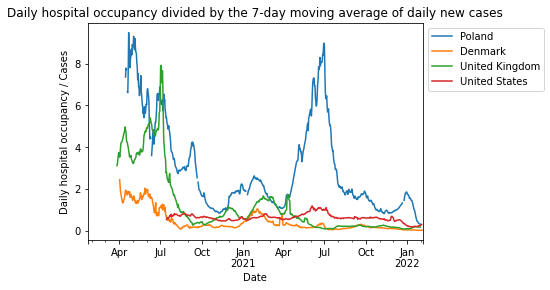

In [54]:
fig, ax = plt.subplots()
for country in countries:

    # df[country]['Daily hospital occupancy / Cases'].plot(ax=ax)
    # df[country]['Daily hospital occupancy / Cases'].rolling(7).mean().plot(ax=ax)
    df1 = df[country]['Daily hospital occupancy']  / df[country]['Cases'].rolling(7).mean() 
    df1.plot(ax=ax, label=country) 
    # df2 = df[country]['Daily hospital occupancy'].rolling(7).mean()   / df[country]['Cases'].rolling(7).mean()
    # df2.plot(ax=ax, label=country) 

ax.set_title('Daily hospital occupancy divided by the 7-day moving average of daily new cases')
ax.set_ylabel('Daily hospital occupancy / Cases')
legendparams = {} #{'labels':countries}
legendparams = set_legend_right(legendparams)
ax.legend(**legendparams);


Zajętość łóżek jest kumulatywna, więc może być więcej zajętych łóżek niż nowych chorych danego dnia. Wykres ma prawo być większy od 1

# Dodać przesunięcie hospitalizacji do cases ok. 14 dni lub oszacować ile.

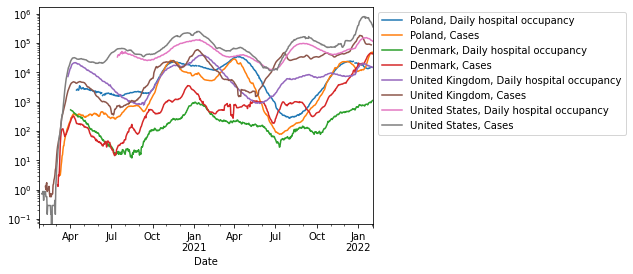

In [67]:
shift = 0

fig, ax = plt.subplots()
for country in countries:

    df[country]['Daily hospital occupancy'].plot(ax=ax, label=country+', Daily hospital occupancy',\
         logy=True) 
    # df[country]['Cases'].rolling(7).mean().plot(ax=ax, label=country+ ', Cases')
    df[country]['Cases'].rolling(7).mean().shift(shift).plot(ax=ax, label=country+ ', Cases')
    # df1 = df[country]['Daily hospital occupancy']  / df[country]['Cases'].rolling(7).mean() 
    # df1.plot(ax=ax, label=country) 
    
# ax.set_title('Daily hospital occupancy divided by the 7-day moving average of daily new cases')
# ax.set_ylabel('Daily hospital occupancy / Cases')
legendparams = {} #{'labels':countries}
legendparams = set_legend_right(legendparams)
ax.legend(**legendparams);

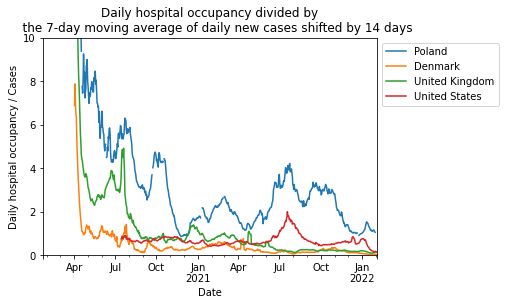

In [64]:
shift=14
fig, ax = plt.subplots()
for country in countries:
    df1 = df[country]['Daily hospital occupancy']  / df[country]['Cases'].shift(shift).rolling(7).mean() 
    df1.plot(ax=ax, label=country) 
ax.set_title('Daily hospital occupancy divided by\n\
    the 7-day moving average of daily new cases shifted by '+ str(shift) +' days')
ax.set_ylabel('Daily hospital occupancy / Cases')
# ax.set_ylim(0,25)
ax.set_ylim(0,10)
legendparams = {} #{'labels':countries}
legendparams = set_legend_right(legendparams)
ax.legend(**legendparams);

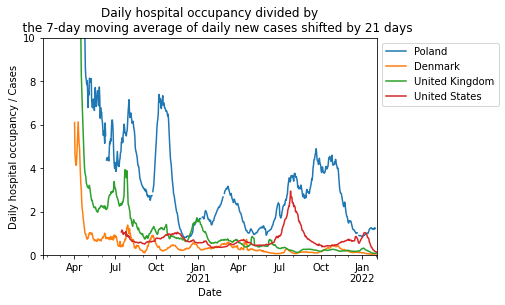

In [65]:
shift=21
fig, ax = plt.subplots()
for country in countries:
    df1 = df[country]['Daily hospital occupancy']  / df[country]['Cases'].shift(shift).rolling(7).mean() 
    df1.plot(ax=ax, label=country) 
ax.set_title('Daily hospital occupancy divided by\n\
    the 7-day moving average of daily new cases shifted by '+ str(shift) +' days')
ax.set_ylabel('Daily hospital occupancy / Cases')
# ax.set_ylim(0,25)
ax.set_ylim(0,10)
legendparams = {} #{'labels':countries}
legendparams = set_legend_right(legendparams)
ax.legend(**legendparams);

Trudno wybrać przesunięcie, bo dla różnych krajów i różnych okresów są różne.

Skoro Radek mówi, że hospitalizacje covidowe to nie to samo, co choroba na covid, może lepiej zamiast hospitalizacji dać zgony